#Creación y Entrenamiento de Red Convolucional

---
###Dependencias
---

In [ ]:
# Librerías para las redes convolucionales

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Libreria para arreglos multidimensionales
import numpy as np

# Librería para preprocesamiento de imagenes al mismo formato usado luego con la camara
import cv2

# Librería para graficar 
import matplotlib.pyplot as plt

# Librerías para métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import ConfusionMatrixDisplay

---


###Lectura y preprocesamiento de datos


---

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Rutas

main_path = '/content/drive/MyDrive/3er Semestre/Introducción a la Ciencia de Datos/Reto Final'
train_data_path = main_path + '/data/train'
val_data_path = main_path + '/data/val'
test_data_path = main_path + '/data/test'
num_classes = 16

In [ ]:
#Libreria que permite separar el conjunto de imagenes para entrenar, validar y probar.
!pip install split-folders

In [ ]:
import splitfolders

input_folder = main_path + "/data/all_images"
output = main_path + "/data"

splitfolders.fixed(input_folder, output=output, seed=41, fixed=(1000, 250, 250)) # separa imagenes en carpetas train/val/test por clases

In [ ]:
#Preprocesamiento de imagenes

def preprocessing(img):
    img =cv2.equalizeHist(img) # estandarizar la iluminacion
    return img

# rescale: Normalizar a valores entre 0 y 1 en lugar de 0 y 255

train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocessing)
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocessing)
validation_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocessing)

In [ ]:
#Cargar Imagenes

train_generator = train_datagen.flow_from_directory(train_data_path,target_size=(32,32),color_mode='grayscale',batch_size=30,class_mode='categorical',shuffle=True)
test_generator = test_datagen.flow_from_directory(val_data_path,target_size=(32,32),color_mode='grayscale',batch_size=1,class_mode='categorical',shuffle=False)
validation_generator = validation_datagen.flow_from_directory(test_data_path,target_size=(32,32),color_mode='grayscale',batch_size=30,class_mode='categorical',shuffle=True)




---


### Construcción y compilación del Modelo


---

In [4]:
# Se define como un modelo secuencial
model = Sequential()

# Se añaden las capas y sus hiperparámetros
model.add(Conv2D(30, (3, 3), padding='same', input_shape=(32, 32, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #16x16
model.add(Dropout(0.25))

model.add(Conv2D(30, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #8x8
model.add(Dropout(0.25))

model.add(Conv2D(30, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #4x4
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# La capa de salida debe tener el mismo número de clases
model.add(Dense(16, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 30)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 30)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 30)          0

In [ ]:
#Compilation
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


---

###Entrenamiento del Modelo


---

In [ ]:
# Funciones callbacks
callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5), ModelCheckpoint(filepath=main_path+'/model_trained.h5', monitor='val_loss', save_best_only=True, verbose=1,mode='min')]


step_size_train=train_generator.n/train_generator.batch_size
step_size_validation=validation_generator.n/validation_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   validation_steps = step_size_validation,
                   epochs=30, callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 2.0375 - accuracy: 0.2610
Epoch 1: val_loss improved from inf to 1.66148, saving model to /content/drive/MyDrive/3er Semestre/Introducción a la Ciencia de Datos/Reto Final/model_trained.h5
100/100 [==============================] - 724s 7s/step - loss: 2.0375 - accuracy: 0.2610 - val_loss: 1.6615 - val_accuracy: 0.4500
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 1.3609 - accuracy: 0.5183
Epoch 2: val_loss improved from 1.66148 to 1.12935, saving model to /content/drive/MyDrive/3er Semestre/Introducción a la Ciencia de Datos/Reto Final/model_trained.h5
100/100 [==============================] - 32s 322ms/step - loss: 1.3609 - accuracy: 0.5183 - val_loss: 1.1293 - val_accuracy: 0.6140
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 1.0126 - accuracy: 0.6257
Epoch 3: val_loss improved from 1.12935 to 0.88449, saving model to /content/drive/MyDrive/3er Semestre/Introducción

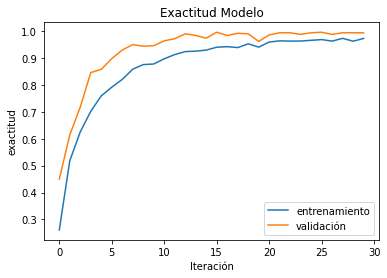

In [ ]:
# Gráfica de la métrica de precisión

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud Modelo')
plt.ylabel('exactitud')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='lower right')
plt.show()

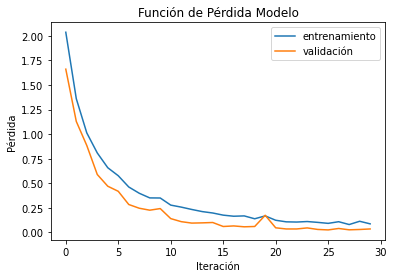

In [ ]:
# Gráfica de la función de pérdida

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de Pérdida Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='upper right')
plt.show()

---
###Evaluación del Modelo


---

In [ ]:
#Cargar modelo
model_trained = load_model(main_path+"/model_trained.h5")

In [ ]:
step_size_test=test_generator.n/test_generator.batch_size
result_evaluate =  model_trained.evaluate_generator(test_generator,step_size_test,verbose=1)
print(result_evaluate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


500/500 [==============================] - 184s 367ms/step - loss: 0.0470 - accuracy: 0.9880
[0.04699607938528061, 0.9879999756813049]


In [ ]:
y_pred_prob =  model_trained.predict_generator(test_generator, steps=step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
accuracy = accuracy_score(test_generator.classes, y_pred_classes)
print('\nExactitud: %f' % accuracy)

precision = precision_score(test_generator.classes, y_pred_classes, average = 'macro')
print('\nPrecision:', precision)

recall = recall_score(test_generator.classes, y_pred_classes, average = 'macro')
print('\nRecall: %f' % recall)

f1 = f1_score(test_generator.classes, y_pred_classes, average = 'macro')
print('\nF1 score: %f' % f1)

kappa = cohen_kappa_score(test_generator.classes, y_pred_classes)
print('\nCohens kappa: %f' % kappa)


Exactitud: 0.988000

Precision: 0.9884180540140584

Recall: 0.988000

F1 score: 0.988035

Cohens kappa: 0.986667
